# Dependencies


In [3]:
!pip install torch==1.8.2+cpu torchvision==0.9.2+cpu torchaudio===0.8.2 -f https://download.pytorch.org/whl/lts/1.8/torch_lts.html

Looking in links: https://download.pytorch.org/whl/lts/1.8/torch_lts.html


In [4]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...


In [6]:
!cd yolov5 & pip install -r requirements.txt

In [7]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

# Model


In [8]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\Danny/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2022-4-15 torch 1.8.2+cpu CPU



  0%|          | 0.00/14.1M [00:00<?, ?B/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.5 GFLOPs


Adding AutoShape... 


In [9]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): Model(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
           

# Image Detections

In [75]:
img = 'https://www.beechmountainresort.com/wp-content/uploads/2020/09/021020-0687-beech-mountain.jpg'

In [76]:
results = model(img)
results.print()

image 1/1: 1600x2400 2 persons, 2 snowboards
Speed: 195.1ms pre-process, 251.1ms inference, 1.0ms NMS per image at shape (1, 3, 448, 640)


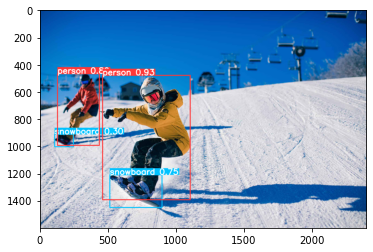

In [77]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

# Video Detections

In [109]:
cap = cv2.VideoCapture('driving.mp4')

while cap.isOpened():
    ret, frame = cap.read()
    
    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    
    results = model(rgb)
    
    cv2.imshow('Object Detection', np.squeeze(results.render()))
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

# Webcam Detection


In [88]:
cap = cv2.VideoCapture(1)
while cap.isOpened():
    ret, frame = cap.read()
    
    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    
    results = model(rgb)
    
    cv2.imshow('Object Detection', np.squeeze(results.render()))
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

#  Custom Model